# Элементы работы с матрицами.

## Работа с матрицами
#### Арифметические операции, свойства и трансформации

In [1]:
import numpy as np
import scipy as sp

In [30]:
# Задаём свою матрицу
A = np.array([[3, 1, 4], [1, 5, 9], [2, 6, 5]])
B = np.mat([[3, 1, 4], [1, 5, 9], [2, 6, 5]])
print(repr(A))
print(repr(B))

array([[3, 1, 4],
       [1, 5, 9],
       [2, 6, 5]])
matrix([[3, 1, 4],
        [1, 5, 9],
        [2, 6, 5]])


In [23]:
# Транспонируем
A.T

array([[3, 1, 2],
       [1, 5, 6],
       [4, 9, 5]])

In [27]:
print(repr(B.A)) # Представляем numpy.matrix в виде numpy.array

# Устраняем одну размерность
print(repr(A.flatten()))
print(repr(B.A1))

array([[3, 1, 4],
       [1, 5, 9],
       [2, 6, 5]])
array([3, 1, 4, 1, 5, 9, 2, 6, 5])
array([3, 1, 4, 1, 5, 9, 2, 6, 5])


In [6]:
A + np.eye(A.shape[0])

array([[ 4.,  1.,  4.],
       [ 1.,  6.,  9.],
       [ 2.,  6.,  6.]])

In [34]:
print(repr(np.linalg.inv(A)))
print(B**(-1))

array([[ 0.32222222, -0.21111111,  0.12222222],
       [-0.14444444, -0.07777778,  0.25555556],
       [ 0.04444444,  0.17777778, -0.15555556]])
[[ 0.32222222 -0.21111111  0.12222222]
 [-0.14444444 -0.07777778  0.25555556]
 [ 0.04444444  0.17777778 -0.15555556]]


In [46]:
print(repr(A.dot(np.linalg.inv(A))))
print(repr(B * B.I))

array([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [ -1.66533454e-16,   1.00000000e+00,   2.22044605e-16],
       [ -5.55111512e-17,  -1.11022302e-16,   1.00000000e+00]])
matrix([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [ -1.66533454e-16,   1.00000000e+00,   2.22044605e-16],
        [ -5.55111512e-17,  -1.11022302e-16,   1.00000000e+00]])


In [47]:
print(repr(np.linalg.matrix_power(A, 3)))
print(repr(B**3)) # B*B*B

array([[ 168,  424,  565],
       [ 346,  990, 1294],
       [ 302,  854, 1081]])
matrix([[ 168,  424,  565],
        [ 346,  990, 1294],
        [ 302,  854, 1081]])


In [48]:
b = np.array([1,2,3])
b

array([1, 2, 3])

In [49]:
print(repr(A.dot(b)))

array([17, 38, 29])


In [50]:
print(repr(b.dot(A)))
print(repr(b.T * B))

array([11, 29, 37])
matrix([[11, 29, 37]])


In [52]:
print(repr(A.reshape(9,1)))
print(repr(B.resize(9,1)))
B

array([[3],
       [1],
       [4],
       [1],
       [5],
       [9],
       [2],
       [6],
       [5]])
None


matrix([[3],
        [1],
        [4],
        [1],
        [5],
        [9],
        [2],
        [6],
        [5]])

In [53]:
np.vstack((A,b))

array([[3, 1, 4],
       [1, 5, 9],
       [2, 6, 5],
       [1, 2, 3]])

In [55]:
# np.hstack((A,b[:,np.newaxis]))
np.hstack((A,b[:,None]))

array([[3, 1, 4, 1],
       [1, 5, 9, 2],
       [2, 6, 5, 3]])

In [57]:
e, u = np.linalg.eig(A)
print(e)
print(A.dot(u))
print(u.dot(np.diag(e)))

[ 13.08576474   2.58000566  -2.66577041]
[[-4.12759613 -2.45402588  0.86297582]
 [-9.46180727  0.79415988  1.87198216]
 [-8.04203906  0.05912928 -1.69035125]]
[[-4.12759613 -2.45402588  0.86297582]
 [-9.46180727  0.79415988  1.87198216]
 [-8.04203906  0.05912928 -1.69035125]]


#### Решение линейных систем
Если мы имеет линейную систему
$$ Ax = b,$$
то в общем виде $x$ можно попытаться найти так: $$x = A^{-1}b$$

In [58]:
print(A)
print(b)

[[3 1 4]
 [1 5 9]
 [2 6 5]]
[1 2 3]


In [59]:
x = np.linalg.inv(A).dot(b)
x

array([ 0.26666667,  0.46666667, -0.06666667])

In [60]:
# Проверка:
A.dot(x) - b

array([  2.22044605e-16,   8.88178420e-16,   8.88178420e-16])

В случае матриц не самого приятного вида и не лучших размеров, лучше воспользоваться другими способами, например:

In [61]:
np.linalg.solve(A, b)

array([ 0.26666667,  0.46666667, -0.06666667])

In [62]:
from scipy import linalg as lin

LU = lin.lu_factor(A)
lin.lu_solve(LU, b)

array([ 0.26666667,  0.46666667, -0.06666667])

## Расстояние (сходство) между наблюдениями

In [66]:
from sklearn import datasets

iris = datasets.load_iris()

In [72]:
iris.keys()

dict_keys(['DESCR', 'data', 'target_names', 'target', 'feature_names'])

In [73]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [74]:
X = iris.data.copy()
X[:5, :]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [75]:
y = iris.target
print(y[:5])
print(np.unique(y))

[0 0 0 0 0]
[0 1 2]


Расчет расстояний (схожести) между наблюдениями призван ответить на вопрос: "насколько близки (схожи) эти наблюдения". Рассмотрим наиболее известные расстояния:

* Euclidean Distance
$$ d(a, b) = \sqrt{\sum_i (a_i - b_i)^2} $$
* Manhattan Distance
$$ d(a, b) = \sum_i |a_i - b_i| $$
* Cosine Distance
$$ d(a, b) = 1 - \frac{a^\top b}{||a||_2\cdot||b||_2}$$
* Correlation Distance
$$ d(a, b) = 1 - \frac{(a-\bar{a})^\top (b - \bar{b})}{||(a-\bar{a})||_2\cdot||(b - \bar{b})||_2}$$
* ...

Многие из вариантов можно посмотреть [здесь](http://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [76]:
from scipy.spatial import distance
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10.0, 8.0)

%matplotlib inline

In [83]:
d = distance.pdist(X, metric='euclidean')
d.shape

(11175,)

In [78]:
D = distance.squareform(d)

In [79]:
D.shape

(150, 150)

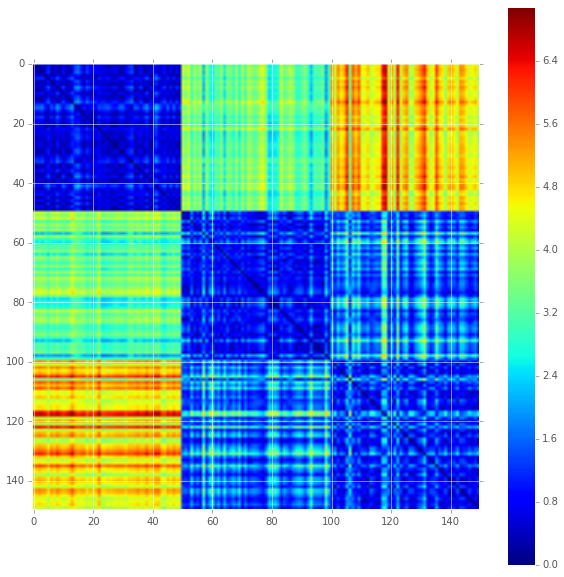

In [80]:
plt.figure(figsize=(10,10))
plt.imshow(D, interpolation=None)
plt.colorbar()

### Подводные камни:
* Разные числовые шкалы признаков
* Разные физические шкалы признаков
* [Проклятье размерноти](http://www.machinelearning.ru/wiki/index.php?title=%D0%9F%D1%80%D0%BE%D0%BA%D0%BB%D1%8F%D1%82%D0%B8%D0%B5_%D1%80%D0%B0%D0%B7%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D1%81%D1%82%D0%B8)

### Работа с разными шкалами признаков
* Трансформация признаков (dummy-переменные)
* Как вариант, можно придумать собственную меру, которая в зависимости от шкалы сответствующего признака будет считать то расстояние, которое вам нужно.
* Взвешивание признаков.

In [84]:
# Представим, что класс растений - тоже является признаком, причем номинальным.
# Считать любые из вышеперечисленных расстояний не имеет смысла
#
# Но можно сделать так:
dummy = (y[:, None] == np.unique(y)).astype(float)

In [85]:
dummy[:5,:]

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]])

### Разные физические размерности признаков
Представьте, что в Iris признаки 2-4 стали измеряться в метрах

In [86]:
X[:, 1:] = X[:, 1:]/100
X[:5, :]

array([[  5.10000000e+00,   3.50000000e-02,   1.40000000e-02,
          2.00000000e-03],
       [  4.90000000e+00,   3.00000000e-02,   1.40000000e-02,
          2.00000000e-03],
       [  4.70000000e+00,   3.20000000e-02,   1.30000000e-02,
          2.00000000e-03],
       [  4.60000000e+00,   3.10000000e-02,   1.50000000e-02,
          2.00000000e-03],
       [  5.00000000e+00,   3.60000000e-02,   1.40000000e-02,
          2.00000000e-03]])

In [87]:
d = distance.pdist(X, metric='euclidean',)
D = distance.squareform(d)

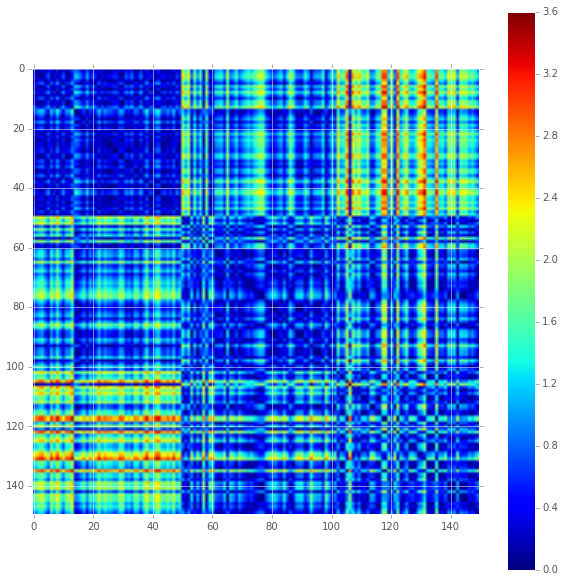

In [88]:
plt.figure(figsize=(10,10))
plt.imshow(D, interpolation=None)
plt.colorbar()

Из-за того, что значения в первом признаке велики по сравнению со значениями в остальных признаках, то он автоматически получает бОльший вес при расчете расстояний. Выход - **нормализовать признаки** так, чтобы они находились в одной физической шкале

#### Z-score

In [97]:
import sklearn.preprocessing as prep
X = (X - X.mean(axis=0))/X.std(axis=0)
# prep.normalize(X)

In [98]:
print(X.mean(axis=0))
print(X.std(axis=0))
print(X.min())
print(X.max())

[  1.66533454e-17  -1.93363843e-17  -2.51650552e-17  -2.49800181e-15]
[ 1.  1.  1.  1.]
-2.43898725249
3.11468391068


#### Min-max

In [99]:
X = (X - X.min(axis=0))/(X.max(axis=0) - X.min(axis=0))

In [100]:
print(X.mean(axis=0))
print(X.std(axis=0))
print(X.min())
print(X.max())

[ 0.4287037   0.43916667  0.46757062  0.45777778]
[ 0.22925036  0.18006108  0.29805579  0.31692192]
0.0
1.0


### Проклятье размерности
Надо понижать размерность признакового пространства. Но как?

## Метод главных компонент

Метод главных компонент - метод уменьшения размерности данных. Он позволяет отобрать самые "изменчивые" переменные. Но это не просто отбор.

Метод главных компонент производит замену исходных переменных на новые, т.ч.:
    
    1. Новые переменные равны линейной комбинацией старых переменных
    2. Новые переменные не коррелируют между собой
    3. Новые переменные подбираются так, чтобы максимировать собственную выборочную дисперсию

Для любой матрицы $A$ размера $n \times m$ можно найти разложение вида:
$$ A = U \Sigma V^\top ,$$
где 
* $U$ - унитарная матрица, состоящая из собственных векторов $AA^\top$
* $V$ - унитарная матрица, состоящая из собственных векторов $A^\top A$
* $\Sigma$ - Диагональная матрица с сингулярными числами

Матрицы $U$ и $V$ ортогональны и могут быть использованы для перехода к ортогональному базису:
$$ AV = U\Sigma $$

Сокращение размерности заключается в том, что вместо того, чтобы умножать $A$ на всю матрицу $V$, а лишь на первые $k<m$ её столбцов - матрицу $V'$

Квадраты сингулярных чисел в $\Sigma$ содержат долю дисперсии, которая содержится в соответствующих главных компонентах

In [101]:
# Вновь возьмем нажу матрицу из Iris
X = iris.data.copy()

# Стандартизируем её
X = (X - X.mean(axis=0))/X.std(axis=0)

In [102]:
u.shape

(3, 3)

In [103]:
u,s,v = np.linalg.svd(X)

In [104]:
PC = X.dot(v.T)

In [105]:
v_expl = s*s/(s*s).sum()

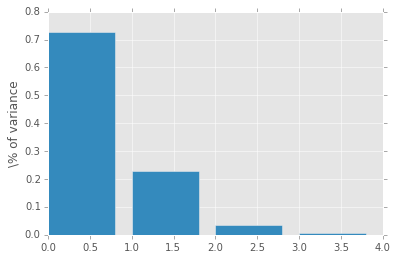

In [107]:
# Доля дисперсии в главных компонентах
plt.bar(range(4), v_expl)
plt.ylabel('\% of variance')

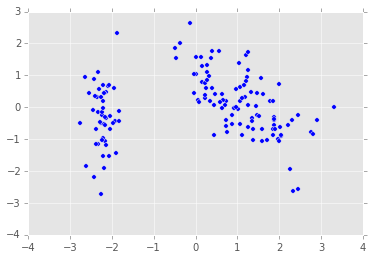

In [108]:
palette = plt.cm.flag
plt.scatter(PC[:,0], PC[:, 1])